# **MODELAGEM POR TÓPICOS - DADOS DA OMS**

## Importando o BD & Inicializando variáveis

In [1]:
!pip install pyLDAvis
import pandas as pd
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=f90a28658175af471c8b912dcdf1326fec29f33269197269c4cead2ed5623211
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=607541687c3ba1d6c20d11be288801038b95588bc2372f964b3e7e18ee4aba36
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [ ]:
## opcao de leitura do arquivo direto do nosso diretorio compartilhado no gdrive ##
from google.colab import drive
drive.mount('/content/drive/')
path_drive = '/content/drive/My Drive/IC - Matheus/'
path_datasets = path_drive + 'Datasets/'
path_models = path_drive + 'Códigos/Modelos/'
ENTITY = 'OPAS'

Mounted at /content/drive/


In [ ]:
# número de tópicos escolhido
num_topics = 20

In [ ]:
## arquivos que serão gerados / lidos
LDAvis_data_filepath = os.path.join(path_models + ENTITY + '_ldavis_prepared_'+str(num_topics))
LDAvis_html_filepath = os.path.join(LDAvis_data_filepath + '.html')
lda_model_filepath = os.path.join(path_models + ENTITY + '_lda_model_' + str(num_topics))
corpus_filepath = os.path.join(path_models + ENTITY + '_corpus_' + str(num_topics))
id2word_filepath = os.path.join(path_models + ENTITY + '_id2word_' + str(num_topics))

keys_unicas = os.path.join(path_models + ENTITY + '_Keys_unicas_' + str(num_topics) + '.xlsx')
keys_todas = os.path.join(path_models + ENTITY + '_Keys_Todas_' + str(num_topics) + '.xlsx')

covid_dataset_final = os.path.join(path_models + ENTITY + '_coviddatasetfinal_' + str(num_topics) + '.csv')

In [ ]:
#df = pd.read_csv('dataset_opas.csv', encoding='utf8')

#lendo o arquivo

##from google.colab import files
##uploaded = files.upload()
##import io
##covid = pd.read_csv(io.BytesIO(uploaded['dataset_opas.csv']))

#covid = pd.read_csv('dataset_opas.csv')


covid = pd.read_csv(path_datasets + "dataset_opas.csv")
covid.head()

,Unnamed: 0,title,created,link,summary,full_created,full_content
0,0,Diretora da OPAS pede acesso justo e amplo às ...,7 jul 2021,/pt/noticias/7-7-2021-diretora-da-opas-pede-ac...,A diretora da Organização observou que a Regiã...,2021-07-07T18:26:48+00:00,A diretora da Organização observou que a Regiã...
1,1,Novas recomendações de rastreio e tratamento p...,6 jul 2021,/pt/noticias/6-7-2021-novas-recomendacoes-rast...,6 de julho de 2021 – Muitas mulheres em todo o...,2021-07-06T18:21:48+00:00,6 de julho de 2021 – Muitas mulheres em todo o...
2,2,Ministério da Saúde do Brasil lança Guia de At...,30 jun 2021,/pt/noticias/30-6-2021-ministerio-da-saude-do-...,"No guia, constam recomendações sobre quantidad...",2021-07-01T00:17:45+00:00,"No guia, constam recomendações sobre quantidad..."
3,3,OPAS compartilha experiências no enfrentamento...,30 jun 2021,/pt/noticias/30-6-2021-opas-compartilha-experi...,Equipe de especialistas já esteve nos municípi...,2021-06-30T18:56:10+00:00,Equipe de especialistas já esteve nos municípi...
4,4,Diretora da OPAS reassegura aos países que vac...,30 jun 2021,/pt/noticias/30-6-2021-diretora-da-opas-reasse...,"No entanto, Etienne observou que “muito poucos...",2021-06-30T18:44:46+00:00,"No entanto, Etienne observou que “muito poucos..."


In [ ]:
#covid = df
covid.head()

,Unnamed: 0,title,created,link,summary,full_created,full_content
0,0,Diretora da OPAS pede acesso justo e amplo às ...,7 jul 2021,/pt/noticias/7-7-2021-diretora-da-opas-pede-ac...,A diretora da Organização observou que a Regiã...,2021-07-07T18:26:48+00:00,A diretora da Organização observou que a Regiã...
1,1,Novas recomendações de rastreio e tratamento p...,6 jul 2021,/pt/noticias/6-7-2021-novas-recomendacoes-rast...,6 de julho de 2021 – Muitas mulheres em todo o...,2021-07-06T18:21:48+00:00,6 de julho de 2021 – Muitas mulheres em todo o...
2,2,Ministério da Saúde do Brasil lança Guia de At...,30 jun 2021,/pt/noticias/30-6-2021-ministerio-da-saude-do-...,"No guia, constam recomendações sobre quantidad...",2021-07-01T00:17:45+00:00,"No guia, constam recomendações sobre quantidad..."
3,3,OPAS compartilha experiências no enfrentamento...,30 jun 2021,/pt/noticias/30-6-2021-opas-compartilha-experi...,Equipe de especialistas já esteve nos municípi...,2021-06-30T18:56:10+00:00,Equipe de especialistas já esteve nos municípi...
4,4,Diretora da OPAS reassegura aos países que vac...,30 jun 2021,/pt/noticias/30-6-2021-diretora-da-opas-reasse...,"No entanto, Etienne observou que “muito poucos...",2021-06-30T18:44:46+00:00,"No entanto, Etienne observou que “muito poucos..."


## **Pré-processamento dos dados**

In [ ]:
import os
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


stop_words = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Acrescentarei manualmente a palavra "sobre" às stop words, pois não é relevante e estava ocorrendo muito

list_stop_words = ['sobre', 'ser', 'opas', 'saúde', 'saude', 'pan', 'americana']

stop_words.update(list_stop_words)

In [ ]:
#Criaremos a função para pré processamento dos dados

def preprocess(raw_text):
    
    #Expressão regular para manter apenas letras no texto 
    letters_only_text = re.sub("[^a-zA-ZãõÃÕçÇáéíóúÁÉÍÓÚÂÊÎÔÛâêîôû]", " ", raw_text) #DUVIDA: COMO RESUMIR ESSE CÓDIGO? OU FIZ CERTO? COMO REMOVER O \n TAMBÉM

    #Converter o texto todo para minúsculo e fazer um split -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    
    #remover stopwords
    for word in words:
      if word not in stop_words:
        cleaned_words.append(word)
    
    #transformar a lista em uma string novamente
    return " ".join(cleaned_words)

In [ ]:
covid['prep'] = covid['full_content'].apply(preprocess) #cria uma nova coluna 'prep' que trará os dados pré processados, removendo pontos e stop words

In [ ]:
covid.iloc[0,7]

'diretora organização observou região ainda notificando metade mortes registradas mundialmente apenas população alguns países américa sul central totalmente vacinada momento washington dc julho diretora organização carissa f etienne pediu nesta quarta feira aumento fornecimento vacinas contra covid américas observando milhões pessoas américa latina caribe ainda sabem chance imunizadas alguns países américa sul central atingidos pandemia forma particularmente forte ainda capazes acessar vacinas suficientes vacinar totalmente populações afirmou etienne coletiva imprensa semanal etienne disse pediu s nações vacinas suficientes compartilhassem países américas ainda lutando chamado começando ressoar diretora observou doações doses ajudando covax expandir substancialmente disponibilidade vacinas próxima entrega cerca milhões doses provenientes estados unidos milhões japão contribuindo alocação esperada cerca milhões doses embora devamos contar doações curto prazo planejamos cenário futuro ha

In [ ]:
covid.iloc[0,6]

'A diretora da Organização observou que a Região ainda está notificando mais da metade das mortes registradas mundialmente, mas apenas 3% da população em alguns países da América do Sul e Central foi totalmente vacinada até o momento\nWashington, DC, 7 de julho de 2021 (OPAS) - A diretora da Organização Pan-Americana da Saúde (OPAS), Carissa F. Etienne, pediu nesta quarta-feira (7) um aumento no fornecimento de vacinas contra a COVID-19 para as Américas, observando que “milhões de pessoas na América Latina e no Caribe ainda não sabem quando terão a chance de ser imunizadas”.\n“Alguns países da América do Sul e Central, atingidos pela pandemia de forma particularmente forte, ainda não foram capazes de acessar vacinas suficientes para vacinar totalmente 3% de suas populações”, afirmou Etienne na coletiva de imprensa semanal da OPAS.\nEtienne disse que “a OPAS pediu às nações com vacinas suficientes para que as compartilhassem com os países das Américas que ainda estão lutando. Esse chama

## **Processo para criação dos tópicos**

**======= INIT: Do not run the following cells =======**

In [ ]:
#Convertendo o objeto tokenizado em um corpus e dicionário

import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data = covid.prep.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['diretora', 'organizacao', 'observou', 'regiao', 'ainda', 'notificando', 'metade', 'mortes', 'registradas', 'mundialmente', 'apenas', 'populacao', 'alguns', 'paises', 'america', 'sul', 'central', 'totalmente', 'vacinada', 'momento', 'washington', 'dc', 'julho', 'diretora', 'organizacao', 'carissa', 'etienne', 'pediu', 'nesta', 'quarta']


In [ ]:
# Build bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Form Trigrams
data_words = make_trigrams(data_words)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
import gensim.corpora as corpora

#Criando um dicionário
id2word = corpora.Dictionary(data_words)

# filter by frequency
id2word.filter_extremes(no_below=5, no_above=0.95)

#Criando um "corpous"
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 3), (6, 5), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 2), (13, 2), (14, 3), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 3), (28, 1), (29, 2)]


### Valor de Coerência

O valor de coerência mede, dentro de um único tópico, a coerência semântica das palavras dentro dele, utilizando a métrica de cossenos para sua similaridade, que vai de 0 a 1. Este é um dos modelos de coerência (o c_v), existem outros, que não cabem a discussão neste post. Existem outros critérios para avaliar também modelagem de tópicos, como a perplexidade.

  0%|          | 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(E

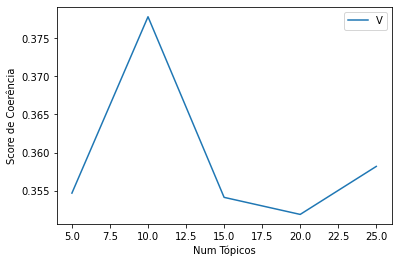

A quantidade de tópicos = 5  tem um valor de coerência de  0.3547
A quantidade de tópicos = 10  tem um valor de coerência de  0.3778
A quantidade de tópicos = 15  tem um valor de coerência de  0.3541
A quantidade de tópicos = 20  tem um valor de coerência de  0.3519
A quantidade de tópicos = 25  tem um valor de coerência de  0.3582


In [ ]:
from tqdm import tqdm
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Função para determinar a melhor quantidade de tópicos para a modelagem
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=5):
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        #model = LdaMulticore(corpus, id2word=id2word, num_topics=10)
        lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       iterations=200,
                                       random_state=500
                                       )
        model = lda_model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
limit=30; start=5; step=5;
# Colocando parametros na função
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=start, limit=limit, step=step)
# Mostrando visualmente a quantidade de tópicos
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Tópicos")
plt.ylabel("Score de Coerência")
plt.legend(("Valores de Coerência"), loc='best')
plt.show()
# Lista dos valores de coerência, para melhor identificar o ponto de inflexão do gráfico
for m, cv in zip(x, coherence_values):
    print("A quantidade de tópicos =", m, " tem um valor de coerência de ", round(cv, 4))

### Gerando o modelo final de tópicos

In [ ]:
from pprint import pprint

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       iterations=200,
                                       random_state=500
                                       )
# Print top-n keywords of each topic
pprint(lda_model.print_topics(num_words=20))
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0,
  '0.014*"desenvolvimento" + 0.011*"oms" + 0.009*"global" + 0.009*"relatorio" '
  '+ 0.009*"medicamentos" + 0.007*"presidente" + '
  '0.006*"resistencia_antimicrobiana" + 0.006*"financiamento" + '
  '0.006*"pesquisa" + 0.006*"infeccoes" + 0.006*"investimentos" + '
  '0.005*"alguns" + 0.005*"bem" + 0.004*"tratamentos" + 0.004*"iniciativa" + '
  '0.004*"desenvolver" + 0.004*"novos" + 0.004*"mercado" + 0.004*"agentes" + '
  '0.004*"ameaca"'),
 (1,
  '0.018*"paises" + 0.017*"covid" + 0.016*"mental" + 0.013*"pessoas" + '
  '0.012*"casos" + 0.008*"vacinas" + 0.008*"mortes" + 0.008*"americas" + '
  '0.007*"doses" + 0.007*"oms" + 0.007*"regiao" + 0.007*"pandemia" + '
  '0.006*"diretora" + 0.006*"servicos" + 0.005*"milhoes" + 0.005*"todos" + '
  '0.005*"anos" + 0.005*"vacinacao" + 0.005*"etienne" + 0.005*"numero"'),
 (2,
  '0.018*"paises" + 0.017*"covid" + 0.013*"vacinas" + 0.010*"regiao" + '
  '0.010*"americas" + 0.009*"pandemia" + 0.008*"milhoes" + 0.008*"malaria" + '
  '0.008*"contra" +

In [ ]:
##cwd = os.getcwd()
##print(cwd)

In [ ]:
# Visualize the topics
import pyLDAvis.gensim_models
import pyLDAvis

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.031698  0.023624       1        1  13.840373
12    -0.011645  0.014401       2        1  12.784184
9     -0.023999  0.034640       3        1  11.342582
3      0.010228 -0.007082       4        1  10.953906
17    -0.002972  0.035528       5        1   8.218193
2     -0.011671  0.037096       6        1   7.469383
11     0.028104 -0.003575       7        1   6.058259
1      0.002460  0.042763       8        1   5.251488
10     0.033805 -0.006606       9        1   4.046164
18     0.054718 -0.008691      10        1   3.436881
15    -0.041302 -0.000350      11        1   3.244995
6      0.048775 -0.035082      12        1   2.627222
14     0.075299 -0.059754      13        1   1.779034
16     0.046609  0.012697      14        1   1.750000
8     -0.160800  0.048855      15        1   1.565969
13     0.051216  0.028679      16        1   1.325637
4      0.029965  0.017416      17        1   1.320762
19    -0.012164  0.015403      18        1   1.281475
7      0.008073 -0.029255      19        1   1.242710
0     -0.093002 -0.160707      20        1   0.460784, topic_info=          Term         Freq        Total Category  logprob  loglift
134    vacinas   715.000000   715.000000  Default  30.0000  30.0000
274        oms   690.000000   690.000000  Default  29.0000  29.0000
536      casos   543.000000   543.000000  Default  28.0000  28.0000
42       covid  1209.000000  1209.000000  Default  27.0000  27.0000
41       covax   230.000000   230.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
420      mundo     1.383592   206.645235  Topic20  -5.5819   0.3737
306  progresso     1.221522    79.531639  Topic20  -5.7065   1.2039
42       covid     1.454551  1209.141362  Topic20  -5.5319  -1.3430
103   pandemia     1.321373   646.301328  Topic20  -5.6279  -0.8126
313      quase     1.129879   120.460948  Topic20  -5.7845   0.7108

[1386 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
2262      1  0.114384  abastecimento
2262      3  0.114384  abastecimento
2262      4  0.114384  abastecimento
2262      6  0.228769  abastecimento
2262      7  0.114384  abastecimento
...     ...       ...            ...
2098     17  0.064558           zika
2112      4  0.282899          zonas
2112      8  0.141449          zonas
2112      9  0.141449          zonas
2112     14  0.282899          zonas

[7014 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 13, 10, 4, 18, 3, 12, 2, 11, 19, 16, 7, 15, 17, 9, 14, 5, 20, 8, 1])

### Salvando modelo de tópicos treinado

In [ ]:
import pyLDAvis.gensim_models
import os
import pickle 
import pyLDAvis

# Visualize the topics
##pyLDAvis.enable_notebook()

##LDAvis_data_filepath = os.path.join(cwd+'/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    ##LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)


#pyLDAvis.save_html(LDAvis_prepared, cwd+'/ldavis_prepared_'+ str(num_topics) +'.html')
pyLDAvis.save_html(LDAvis_prepared, LDAvis_html_filepath)
##LDAvis_prepared

In [ ]:
a = lda_model.show_topics(num_topics = num_topics,formatted=False, num_words=20)

chaves = list(dict(a[0][1]).keys())
opas = pd.DataFrame(chaves)
for i in range(1,21):
    opas[i] = opas[0]
    for j in range(0,20):
        palavra = chaves[j]
        if (palavra in dict(a[i-1][1])):
            opas[i][j] = dict(a[i-1][1])[palavra]
        else:
            opas[i][j] = 0

opas = opas.rename(columns={0: 'Key'})
opas 

,Key,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,desenvolvimento,0.01415,0,0,0,0,0,0.004056,0.005524,0.004805,...,0,0,0,0,0,0,0,0,0,0
1,oms,0.011372,0.007294,0.005458,0.008056,0,0.00786,0.010443,0.006622,0.005283,...,0.007202,0.008443,0.009838,0,0.013399,0.02126,0.007049,0.008296,0.010726,0.014366
2,global,0.009422,0,0,0,0,0.005523,0,0,0.007014,...,0,0,0,0,0,0.004252,0,0,0,0
3,relatorio,0.009275,0,0,0,0,0,0,0,0,...,0.005258,0.006023,0,0,0,0,0,0,0,0
4,medicamentos,0.009159,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,presidente,0.007335,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,resistencia_antimicrobiana,0.006298,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,financiamento,0.006261,0,0,0,0,0,0,0,0.004399,...,0,0,0,0,0,0,0,0,0,0
8,pesquisa,0.006155,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,infeccoes,0.005762,0,0,0,0.00446,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pickle.dump(lda_model,open(lda_model_filepath,'wb'))
pickle.dump(corpus,open(corpus_filepath,'wb'))
pickle.dump(id2word,open(id2word_filepath,'wb'))

In [ ]:
from openpyxl import load_workbook

# Usando o ExcelWriter, cria um doc .xlsx, usando engine='xlsxwriter'. Para abrir um arquivo existente, usar engine=openpyxl
writer = pd.ExcelWriter(keys_unicas, engine='openpyxl')

#book = load_workbook('Keys_Unicas.xlsx')
#writer.book = book

# Armazena cada df em uma planilha diferente do mesmo arquivo
opas.to_excel(writer, sheet_name='Opas')

# Fecha o ExcelWriter e gera o arquivo .xlsx
writer.save()

In [ ]:
lista = []
colunas = []
for i in range(0,20):
    lista.append([])
    for j in range(0,10):
        lista[i].append(list(dict(a[j][1]).keys())[i])
        lista[i].append(list(dict(a[j][1]).values())[i])
    lista [i] = tuple(lista[i])

for i in range(1,11):
    colunas.append('Topic'+str(i))
    colunas.append('%'+str(i))
    
OPAS_total = pd.DataFrame(lista,columns=colunas)

In [ ]:
from openpyxl import load_workbook

# Usando o ExcelWriter, cria um doc .xlsx, usando engine='xlsxwriter'. Para abrir um arquivo existente, usar engine=openpyxl
writer = pd.ExcelWriter(keys_todas, engine='openpyxl')

#book = load_workbook('Keys_Todas.xlsx')
#writer.book = book

# Armazena cada df em uma planilha diferente do mesmo arquivo
OPAS_total.to_excel(writer, sheet_name='Opas')

# Fecha o ExcelWriter e gera o arquivo .xlsx
writer.save()

**======= END: Do not run the previous cells =======**

## Load trained topic model

In [ ]:
import pickle

In [ ]:
lda_model = pickle.load(open(lda_model_filepath,'rb'))
corpus = pickle.load(open(corpus_filepath,'rb'))
id2word = pickle.load(open(id2word_filepath,'rb'))
LDAvis_prepared = pickle.load(open(LDAvis_data_filepath,'rb'))

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
import pyLDAvis.gensim_models
import os
import pickle 
import pyLDAvis

pyLDAvis.enable_notebook()
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.031698  0.023624       1        1  13.867001
12    -0.011645  0.014401       2        1  12.752762
9     -0.023999  0.034640       3        1  11.341697
3      0.010228 -0.007082       4        1  10.949982
17    -0.002972  0.035528       5        1   8.219901
2     -0.011671  0.037096       6        1   7.483067
11     0.028104 -0.003575       7        1   6.058177
1      0.002460  0.042763       8        1   5.250183
10     0.033805 -0.006606       9        1   4.046181
18     0.054718 -0.008691      10        1   3.431637
15    -0.041302 -0.000350      11        1   3.244918
6      0.048775 -0.035082      12        1   2.626922
14     0.075299 -0.059754      13        1   1.778350
16     0.046609  0.012697      14        1   1.750146
8     -0.160800  0.048855      15        1   1.565768
13     0.051216  0.028679      16        1   1.325640
4      0.029965  0.017416      17        1   1.322769
19    -0.012164  0.015403      18        1   1.281518
7      0.008073 -0.029255      19        1   1.242596
0     -0.093002 -0.160707      20        1   0.460784, topic_info=          Term         Freq        Total Category  logprob  loglift
134    vacinas   715.000000   715.000000  Default  30.0000  30.0000
274        oms   690.000000   690.000000  Default  29.0000  29.0000
536      casos   543.000000   543.000000  Default  28.0000  28.0000
42       covid  1209.000000  1209.000000  Default  27.0000  27.0000
41       covax   230.000000   230.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
420      mundo     1.383592   206.607601  Topic20  -5.5819   0.3739
306  progresso     1.221522    79.514359  Topic20  -5.7065   1.2042
42       covid     1.454551  1209.334986  Topic20  -5.5319  -1.3431
103   pandemia     1.321373   646.235098  Topic20  -5.6279  -0.8125
313      quase     1.129879   120.465877  Topic20  -5.7845   0.7107

[1386 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
2262      1  0.114328  abastecimento
2262      3  0.114328  abastecimento
2262      4  0.114328  abastecimento
2262      6  0.228655  abastecimento
2262      7  0.114328  abastecimento
...     ...       ...            ...
2098     17  0.064606           zika
2112      4  0.282911          zonas
2112      8  0.141455          zonas
2112      9  0.141455          zonas
2112     14  0.282911          zonas

[7014 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 13, 10, 4, 18, 3, 12, 2, 11, 19, 16, 7, 15, 17, 9, 14, 5, 20, 8, 1])

In [ ]:
##import pyLDAvis.gensim_models
##import os
##import pickle 
##import pyLDAvis
# Visualize the topics
##pyLDAvis.enable_notebook()
##LDAvis_data_filepath = os.path.join(cwd+'/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
##if 1 == 1:
##    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
##    with open(LDAvis_data_filepath, 'wb') as f:
##        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
##with open(LDAvis_data_filepath, 'rb') as f:
##    LDAvis_prepared = pickle.load(f)
#pyLDAvis.save_html(LDAvis_prepared, cwd+'/ldavis_prepared_'+ str(num_topics) +'.html')

##LDAvis_prepared

In [ ]:
##from openpyxl import load_workbook

# Usando o ExcelWriter, cria um doc .xlsx, usando engine='xlsxwriter'. Para abrir um arquivo existente, usar engine=openpyxl
##writer = pd.ExcelWriter('Keys_Todas.xlsx', engine='openpyxl')

#book = load_workbook('Keys_Todas.xlsx')
#writer.book = book

# Armazena cada df em uma planilha diferente do mesmo arquivo
##OPAS_total.to_excel(writer, sheet_name='Opas')

# Fecha o ExcelWriter e gera o arquivo .xlsx
##writer.save()

In [ ]:
a = lda_model.show_topics(num_topics = num_topics,formatted=False, num_words=20)

chaves = list(dict(a[0][1]).keys())
opas = pd.DataFrame(chaves)
for i in range(1,21):
    opas[i] = opas[0]
    for j in range(0,20):
        palavra = chaves[j]
        if (palavra in dict(a[i-1][1])):
            opas[i][j] = dict(a[i-1][1])[palavra]
        else:
            opas[i][j] = 0

opas = opas.rename(columns={0: 'Key'})
opas       

,Key,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,desenvolvimento,0.01415,0,0,0,0,0,0.004056,0.005524,0.004805,...,0,0,0,0,0,0,0,0,0,0
1,oms,0.011372,0.007294,0.005458,0.008056,0,0.00786,0.010443,0.006622,0.005283,...,0.007202,0.008443,0.009838,0,0.013399,0.02126,0.007049,0.008296,0.010726,0.014366
2,global,0.009422,0,0,0,0,0.005523,0,0,0.007014,...,0,0,0,0,0,0.004252,0,0,0,0
3,relatorio,0.009275,0,0,0,0,0,0,0,0,...,0.005258,0.006023,0,0,0,0,0,0,0,0
4,medicamentos,0.009159,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,presidente,0.007335,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,resistencia_antimicrobiana,0.006298,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,financiamento,0.006261,0,0,0,0,0,0,0,0.004399,...,0,0,0,0,0,0,0,0,0,0
8,pesquisa,0.006155,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,infeccoes,0.005762,0,0,0,0.00446,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
##from openpyxl import load_workbook

# Usando o ExcelWriter, cria um doc .xlsx, usando engine='xlsxwriter'. Para abrir um arquivo existente, usar engine=openpyxl
##writer = pd.ExcelWriter('Keys_Unicas.xlsx', engine='openpyxl')

#book = load_workbook('Keys_Unicas.xlsx')
#writer.book = book

# Armazena cada df em uma planilha diferente do mesmo arquivo
##opas.to_excel(writer, sheet_name='Opas')

# Fecha o ExcelWriter e gera o arquivo .xlsx
##writer.save()

In [ ]:
lista = []
colunas = []
for i in range(0,20):
    lista.append([])
    for j in range(0,10):
        lista[i].append(list(dict(a[j][1]).keys())[i])
        lista[i].append(list(dict(a[j][1]).values())[i])
    lista [i] = tuple(lista[i])

for i in range(1,11):
    colunas.append('Topic'+str(i))
    colunas.append('%'+str(i))
    
OPAS_total = pd.DataFrame(lista,columns=colunas)

## Notícias mais representativas para cada tópico

In [ ]:
df = covid
import numpy as np

def format_topics_sentences(idsnews, ldamodel=lda_model, corpus=corpus, texts=df):
    sent_topics_df = pd.DataFrame()

    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                #if int(topic_num) == 3:
                #    print('*****')
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    contents = pd.Series(texts)
    ids = pd.Series(idsnews)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df = pd.concat([sent_topics_df, ids], axis=1)
    return(sent_topics_df)

idsnews = df.index.values
texts_full = covid.full_content.values.tolist()
df_topic_sents_keywords = format_topics_sentences(idsnews, ldamodel=lda_model, corpus=corpus, texts=texts_full)


df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'Id']

#df_dominant_topic.head(20)

sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(10)], 
                                            axis=0)

sent_topics_sorteddf.reset_index(drop=True, inplace=True)

sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text", "Id"]

# Show
pd.options.display.max_colwidth = 300
pd.options.display.max_rows = 600
sent_topics_sorteddf.index = np.arange(1, len(sent_topics_sorteddf) + 1)
sent_topics_sorteddf['Topic_Num'] = sent_topics_sorteddf['Topic_Num'].apply(lambda x: x+1)
sent_topics_sorteddf_filtered = sent_topics_sorteddf[['Topic_Num', 'Topic_Perc_Contrib', 'Text', 'Id']]

topics_final = pd.DataFrame()

topics_final_grpd = sent_topics_sorteddf_filtered.groupby('Topic_Num')

for i, grp in topics_final_grpd:
    topics_final = pd.concat([topics_final, grp.sort_values(['Topic_Perc_Contrib'], ascending=[0]).head(5)], 
                                            axis=0)

topics_final.reset_index(drop=True, inplace=True)

topics_final.columns = ['Topic_Num', "Topic_Perc_Contrib", "Text", "Id"]

topics_final

,Topic_Num,Topic_Perc_Contrib,Text,Id
0,1.0,0.9973,"15 de abril de 2021 (OMS) – O mundo ainda não está conseguindo desenvolver tratamentos antibacterianos necessários, apesar da crescente conscientização sobre a ameaça urgente da resistência aos antibióticos, de acordo com relatório da Organização Mundial da Saúde. A OMS revela que nenhum dos 43 ...",47
1,2.0,0.9982,"Genebra, 9 de dezembro de 2020 – As doenças crônicas não transmissíveis agora constituem sete das 10 principais causas de morte no mundo, de acordo com as Estimativas Globais de Saúde de 2019 publicadas nesta quarta-feira (9) pela Organização Mundial da Saúde (OMS). Quatro delas estão entre as p...",128
2,2.0,0.9975,"Genebra, 27 de agosto de 2020 – A saúde mental é uma das áreas mais negligenciadas da saúde pública. Quase 1 bilhão de pessoas vivem com transtorno mental, 3 milhões de pessoas morrem todos os anos devido ao uso nocivo do álcool e uma pessoa morre a cada 40 segundos por suicídio. E agora, bilhõe...",218
3,2.0,0.9966,"18 de fevereiro de 2020 – A Organização Pan-Americana da Saúde (OPAS) anunciou um total de 23 casos confirmados da doença causada pelo novo coronavírus (COVID-19) na região das Américas. Até 18 de fevereiro, todos os casos foram notificados nos Estados Unidos (15) e no Canadá (8). O primeiro cas...",267
4,2.0,0.9960,"Washington, D.C., 14 de agosto de 2020 — Embora os países das Américas tenham implementado estratégias inovadoras para impulsionar os programas de imunização durante a pandemia de COVID-19, a preocupação com o risco de exposição ao novo coronavírus, bem como os desafios de acesso aos serviços du...",223
5,2.0,0.9958,"Genebra, 1 de outubro de 2020 – No Dia Mundial da Saúde Mental, celebrado em 10 de outubro, líderes mundiais, celebridades reconhecidas internacionalmente e defensores da saúde mental se reunirão para o grande evento da Organização Mundial da Saúde para a saúde mental. Este é primeiro evento vir...",188
6,3.0,0.9976,"OPAS pede aos governos da América Latina e Caribe que mantenham avanços alcançados\n\nWashington D.C., 23 de novembro de 2020 – Uma análise inédita de dados dos países das Américas sobre violência contra crianças e adolescentes mostra que, embora a região tenha adotado medidas importantes, impor...",144
7,3.0,0.9965,"17 de maio de 2021 (OMS) – Longas jornadas de trabalho levaram a 745 mil mortes por acidente vascular cerebral e doença isquêmica do coração em 2016, um aumento de 29% desde 2000, de acordo com as últimas estimativas da Organização Mundial da Saúde (OMS) e da Organização Internacional do Trabalh...",29
8,3.0,0.9964,"O acordo se concentrará no aumento e ampliação das intervenções que abordam as barreiras aos cuidados de saúde e o impacto desproporcional da COVID-19 sobre as populações migrantes\nWashington D.C., 9 de outubro de 2020 – Mais de 70 milhões de migrantes que vivem na Região das Américas devem se ...",182
9,3.0,0.9964,"“Ainda estamos muito atrás de onde deveríamos estar como Região”, afirmou Carissa F. Etienne\nWashington D.C., 25 de fevereiro de 2021 – A diretora da Organização Pan-Americana da Saúde (OPAS), Carissa F. Etienne, informou nesta quinta-feira (25) aos líderes do PROSUR, o Fórum para o Progresso e...",84


In [ ]:
covid.tail(1)

,Unnamed: 0,title,created,link,summary,full_created,full_content,prep
269,269,OMS declara emergência de saúde pública de importância internacional por surto de novo coronavírus,30 jan 2020,/pt/news/30-1-2020-who-declares-public-health-emergency-novel-coronavirus,"30 de janeiro de 2020 – A Organização Mundial da Saúde (OMS) declarou nesta quinta-feira (30), em Genebra, na Suíça, que o surto do novo coronavírus (2019-nCoV) constitui uma Emergência de Saúde Pública de Importância Internacional (ESPII). Atualmente, há casos em 19 países, com transmissão entr...",2020-01-30T21:54:23+00:00,"30 de janeiro de 2020 – A Organização Mundial da Saúde (OMS) declarou nesta quinta-feira (30), em Genebra, na Suíça, que o surto do novo coronavírus (2019-nCoV) constitui uma Emergência de Saúde Pública de Importância Internacional (ESPII). Atualmente, há casos em 19 países, com transmissão entr...",janeiro organização mundial oms declarou nesta quinta feira genebra suíça surto novo coronavírus ncov constitui emergência pública importância internacional espii atualmente casos países transmissão humanos china alemanha japão vietnã estados unidos américa principal motivo dessa declaração diz ...


## Atribuindo o tópico a cada notícia

In [ ]:
# Função que pega uma lista de palavras e um texto como entrada e conta quantas vezes as palavras da lista aparecem no texto
def count_words(words, text):
    counter = 0
    for word in words:
        for w in text.split():
            if word == w:
                counter+= 1
    return counter

# Função para classificar cada resumo em um tópico, verificando o tópico que contém mais palavras.
# Para cada resumo, cria um dicionário {topic: qtd words da lista} e depois verifica qual é a chave no dicionário com o maior número, que será o número do tópico a ser adicionado a uma lista e devolvido.

def assign_topic(topic, text):
    assign = []
    for row in text:
        topic_counts = {}
        for key, value in topic.items():
            topic_counts[key] = count_words(value, row) #use function previously created
        assign.append(max(topic_counts, key=lambda k: topic_counts[k]))
    return assign

#Criando um dicionário com o número do tópico e as palavras que pertencem a ele
topics = {}
for i in range(1,num_topics+1):
  topics['topico'+str(i)] = list(dict(a[i-1][1]).keys())





In [ ]:
# A lista de tópicos que irão no dataframe
topics_list = assign_topic(topics, covid['prep'])

# Adicionando a coluna de tópicos ao dataframe
covid['topics'] = topics_list
covid.head(10)



,Unnamed: 0,title,created,link,summary,full_created,full_content,prep,topics
0,0,Diretora da OPAS pede acesso justo e amplo às vacinas contra COVID-19 para América Latina e Caribe,7 jul 2021,/pt/noticias/7-7-2021-diretora-da-opas-pede-acesso-justo-e-amplo-vacinas-contra-covid-19-para-america,"A diretora da Organização observou que a Região ainda está notificando mais da metade das mortes registradas mundialmente, mas apenas 3% da população em alguns países da América do Sul e Central foi totalmente vacinada até o momento\n\nWashington, DC, 7 de julho de 2021 (OPAS) - A diretora da Or...",2021-07-07T18:26:48+00:00,"A diretora da Organização observou que a Região ainda está notificando mais da metade das mortes registradas mundialmente, mas apenas 3% da população em alguns países da América do Sul e Central foi totalmente vacinada até o momento\nWashington, DC, 7 de julho de 2021 (OPAS) - A diretora da Orga...",diretora organização observou região ainda notificando metade mortes registradas mundialmente apenas população alguns países américa sul central totalmente vacinada momento washington dc julho diretora organização carissa f etienne pediu nesta quarta feira aumento fornecimento vacinas contra cov...,topico10
1,1,Novas recomendações de rastreio e tratamento para prevenir o câncer do colo do útero,6 jul 2021,/pt/noticias/6-7-2021-novas-recomendacoes-rastreio-e-tratamento-para-prevenir-cancer-do-colo-do-utero,"6 de julho de 2021 – Muitas mulheres em todo o mundo - principalmente as mais pobres - continuam morrendo de câncer do colo do útero, uma doença que pode ser prevenida e tratada. A Organização Mundial da Saúde (OMS) e o Human Reproduction Programme (HRP) lançaram uma nova orientação para ajudar ...",2021-07-06T18:21:48+00:00,"6 de julho de 2021 – Muitas mulheres em todo o mundo - principalmente as mais pobres - continuam morrendo de câncer do colo do útero, uma doença que pode ser prevenida e tratada. A Organização Mundial da Saúde (OMS) e o Human Reproduction Programme (HRP) lançaram uma nova orientação para ajudar ...",julho muitas mulheres todo mundo principalmente pobres continuam morrendo câncer colo útero doença pode prevenida tratada organização mundial oms human reproduction programme hrp lançaram nova orientação ajudar países progredir rapidamente forma equitativa rastreio tratamento dessa enfermidade d...,topico10
2,2,"Ministério da Saúde do Brasil lança Guia de Atividade Física para a População Brasileira, com apoio da OPAS",30 jun 2021,/pt/noticias/30-6-2021-ministerio-da-saude-do-brasil-lanca-guia-atividade-fisica-para-populacao,"No guia, constam recomendações sobre quantidade, intensidade e exemplos de atividades aeróbicas, de força e de equilíbrio, além de indicações para um estilo de vida ativo\n\nBrasília, 30 de junho de 2021 – O Ministério da Saúde do Brasil lançou nesta terça-feira (29/6) o Guia de Atividade Física...",2021-07-01T00:17:45+00:00,"No guia, constam recomendações sobre quantidade, intensidade e exemplos de atividades aeróbicas, de força e de equilíbrio, além de indicações para um estilo de vida ativo\nBrasília, 30 de junho de 2021 – O Ministério da Saúde do Brasil lançou nesta terça-feira (29/6) o Guia de Atividade Física p...",guia constam recomendações quantidade intensidade exemplos atividades aeróbicas força equilíbrio além indicações estilo vida ativo brasília junho ministério brasil lançou nesta terça feira guia atividade física população brasileira material produzido parceria universidade federal pelotas ufpel c...,topico2
3,3,OPAS compartilha experiências no enfrentamento à COVID-19 no estado de Pernambuco,30 jun 2021,/pt/noticias/30-6-2021-opas-compartilha-experiencias-no-enfrentamento-covid-19-no-estado-pernambuco,"Equipe de especialistas já esteve nos municípios de Recife, Gravatá e Vitória de Santo Antão\n\nBrasília, 30 de junho de 2021 – A Organização Pan-Americana da Saúde (OPAS) tem promovido o intercâmbio de experiências no enfrentamento à COVID-19 entre o Brasil e outros 

In [ ]:
#ajustando o formato da coluna de data, e criando uma coluna do tipo: mês-ano
import datetime
covid['Data'] = covid['full_created'].apply(lambda x: x[0:10])
covid['Data'] = covid['Data'].apply(lambda x: datetime.datetime.strptime(x,('%Y-%m-%d')))
covid['Mês/Ano'] = covid['Data'].apply(lambda x: x.strftime('%m-%Y'))
covid['1'] = 1
#covid.drop(columns=['Data'], axis=1, inplace=True)

covid.head(1)

,Unnamed: 0,title,created,link,summary,full_created,full_content,prep,topics,Data,Mês/Ano,1
0,0,Diretora da OPAS pede acesso justo e amplo às vacinas contra COVID-19 para América Latina e Caribe,7 jul 2021,/pt/noticias/7-7-2021-diretora-da-opas-pede-acesso-justo-e-amplo-vacinas-contra-covid-19-para-america,"A diretora da Organização observou que a Região ainda está notificando mais da metade das mortes registradas mundialmente, mas apenas 3% da população em alguns países da América do Sul e Central foi totalmente vacinada até o momento\n\nWashington, DC, 7 de julho de 2021 (OPAS) - A diretora da Or...",2021-07-07T18:26:48+00:00,"A diretora da Organização observou que a Região ainda está notificando mais da metade das mortes registradas mundialmente, mas apenas 3% da população em alguns países da América do Sul e Central foi totalmente vacinada até o momento\nWashington, DC, 7 de julho de 2021 (OPAS) - A diretora da Orga...",diretora organização observou região ainda notificando metade mortes registradas mundialmente apenas população alguns países américa sul central totalmente vacinada momento washington dc julho diretora organização carissa f etienne pediu nesta quarta feira aumento fornecimento vacinas contra cov...,topico10,2021-07-07,07-2021,1


In [ ]:
# salvar dataframe final
covid.to_csv(covid_dataset_final)

## Visualizações

In [ ]:



#Criando uma tabela dinâmica
resumo = pd.pivot_table(covid,
   index=['Mês/Ano'],
   values=['1'],
   columns=['topics'],
   fill_value='',
   margins=True,
   margins_name='Total',
   aggfunc=[np.sum]
  )


resumo


sum                                                        \
              1                                                         
topics  topico1 topico10 topico11 topico12 topico13 topico14 topico15   
Mês/Ano                                                                 
01-2020                                                                 
01-2021              1.0      1.0               2.0                     
02-2020                                         1.0                     
02-2021              3.0               2.0               1.0            
03-2020                                                  1.0            
03-2021     1.0      4.0      1.0               1.0                     
04-2020                                1.0               1.0            
04-2021     1.0      3.0      1.0               1.0      1.0            
05-2020                                                           1.0   
05-2021              3.0      2.0      1.0               1.0      2.0   
06-2020                       2.0                                       
06-2021              4.0                                                
07-2020                       1.0                                       
07-2021              2.0                                                
08-2020              1.0      1.0                        1.0      1.0   
09-2020                                         2.0               1.0   
10-2020              4.0      2.0      2.0      2.0      1.0            
11-2020     2.0      3.0      2.0      2.0               2.0            
12-2020     1.0      2.0      1.0      1.0                              
Total         5       30       14        9        9        9        5   

                                    ...                                   \
                                    ...                                    
topics  topico16 topico17 topico18  ... topico2 topico20 topico3 topico4   
Mês/Ano                             ...                                    
01-2020                        1.0  ...                                    
01-2021                        3.0  ...              2.0                   
02-2020                        2.0  ...                                    
02-2021      4.0      1.0      1.0  ...     1.0      1.0                   
03-2020               1.0      3.0  ...                              1.0   
03-2021      1.0      1.0      1.0  ...                              1.0   
04-2020      1.0               2.0  ...                              2.0   
04-2021      3.0               1.0  ...     1.0              2.0     2.0   
05-2020                        1.0  ...                              1.0   
05-2021      1.0      1.0      2.0  ...                      1.0     1.0   
06-2020      1.0               2.0  ...                              1.0   
06-2021      2.0      1.0      2.0  ...              1.0     1.0     1.0   
07-2020      3.0               3.0  ...                                    
07-2021                             ...     1.0                            
08-2020      2.0               4.0  ...     1.0                      1.0   
09-2020      5.0               4.0  ...     2.0      1.0             2.0   
10-2020      2.0               1.0  ...     1.0      4.0             1.0   
11-2020      2.0      3.0      1.0  ...              1.0                   
12-2020      2.0      1.0      1.0  ...     2.0      1.0     1.0           
Total         29        9       35  ...       9       11       5      14   

                                                       
                                                       
topics  topico5 topico6 topico7 topico8 topico9 Total  
Mês/Ano                                                
01-2020                                             1  
01-2021                     4.0             2.0    15  
02-2020     1.0             1.0                     5  
02-2021                     2.0           

In [ ]:
# salvar modelo
##import pickle

# salvar o modelo lda_model  no arquivo lda_model.pkl
##with open('lda_model.pkl', 'wb') as file:
##    pickle.dump(lda_model, file)

In [2]:
# Carregar modelo
#with open('lda_model.pkl', 'rb') as f:
#    model = pickle.load(f)

In [3]:
## opcao de leitura do arquivo direto do nosso diretorio compartilhado no gdrive ##
from google.colab import drive
drive.mount('/content/drive/')
path_drive = '/content/drive/My Drive/IC - Matheus/'
path_datasets = path_drive + 'Datasets/Dados Covid - 27032022/'
path_models = path_drive + 'Códigos/Modelos/'

Mounted at /content/drive/


In [4]:
from datetime import datetime

#LENDO O ARQUIVO COM AS NOTICIAS E QUAL O TÓPICO/SEMANA ASSOCIADO
dados = pd.read_csv(path_models + "OPAS_coviddatasetfinal_20.csv",sep=",")



#LENDO O ARQUIVO DE PARA DO DIA PARA A SEMANA
semana = pd.read_excel(path_models + "Depara_Dia_Semana.xlsx")
semana['data'] = semana['data'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))



#LENDO O ARQUIVO DE PARA DO TOPICO PARA O TEMA
tema = pd.read_excel(path_models + "Topico_Tema.xlsx", sheet_name = "OPAS")


In [5]:
df_final = pd.merge(dados, tema, left_on = 'topics', right_on = 'Unnamed: 2', how = 'left')
df_final = pd.merge(df_final, semana, left_on = 'Data', right_on = 'data', how = 'left')
df_final.drop(["Dataset", "Tópico","Unnamed: 2","1","data","casosNovos","obitosNovos","data2"], axis=1, inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    270 non-null    int64  
 1   Unnamed: 0.1  270 non-null    int64  
 2   title         270 non-null    object 
 3   created       270 non-null    object 
 4   link          270 non-null    object 
 5   summary       270 non-null    object 
 6   full_created  270 non-null    object 
 7   full_content  270 non-null    object 
 8   prep          270 non-null    object 
 9   topics        270 non-null    object 
 10  Data          270 non-null    object 
 11  Mês/Ano       270 non-null    object 
 12  Tema Final    270 non-null    float64
 13  Semana        266 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 31.6+ KB


In [ ]:
df_final.to_excel(path_models+'OPAS_coviddatasetfinal_20_temasemana.xlsx', index = False)